In [1]:
import helpful

import cv2
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load images

in_images = [cv2.imread(f'./healthy/{i:02d}_h.jpg') for i in range(1, 16)]
manual_images = [helpful.prep_tif_file(cv2.imread(f'./healthy_manualsegm/{i:02d}_h.tif', 0)) for i in range(1, 16)]

In [3]:
# # Prepera data

# ziped = list(zip(in_images, manual_images))

# random.shuffle(ziped)

# train_data = ziped[:9]
# test_data = ziped[9:]

# helpful.prepere_multiple_images(train_data, 5, "data", "train")
# helpful.prepere_multiple_images(test_data, 5, "data", "test")

In [4]:
# Load data

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

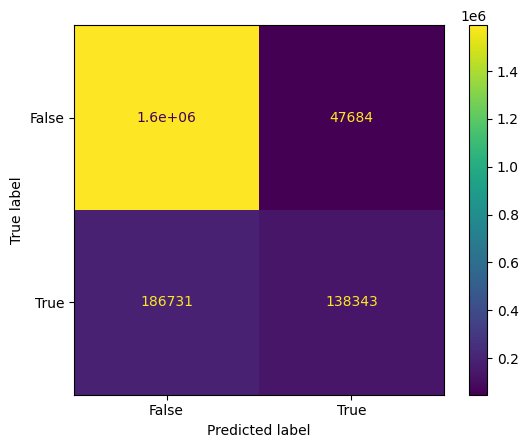

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.89      0.74      0.93      0.82      0.68   1778175
          1       0.43      0.74      0.89      0.54      0.82      0.66    186027

avg / total       0.92      0.88      0.76      0.89      0.82      0.67   1964202



In [5]:
clf = helpful.prep_classifier(train, test)
helpful.save_model(clf)

In [6]:
clf = helpful.load_model()

In [7]:
data = [helpful.pred_image(clf, image, mask) for image, mask in zip(in_images, manual_images)]

pred_images = [image for image, mask in data]
masks = [mask for image, mask in data]

(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)
(2336, 3504)


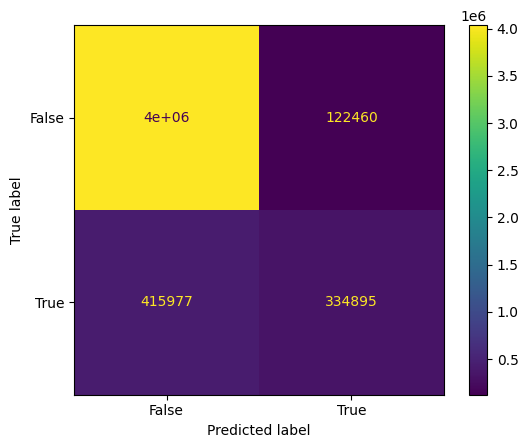

                   pre       rec       spe        f1       geo       iba       sup

      False       0.97      0.91      0.73      0.94      0.81      0.68   4453150
       True       0.45      0.73      0.91      0.55      0.81      0.65    457355

avg / total       0.92      0.89      0.75      0.90      0.81      0.67   4910505



In [8]:
helpful.calc_metrics(masks, pred_images)

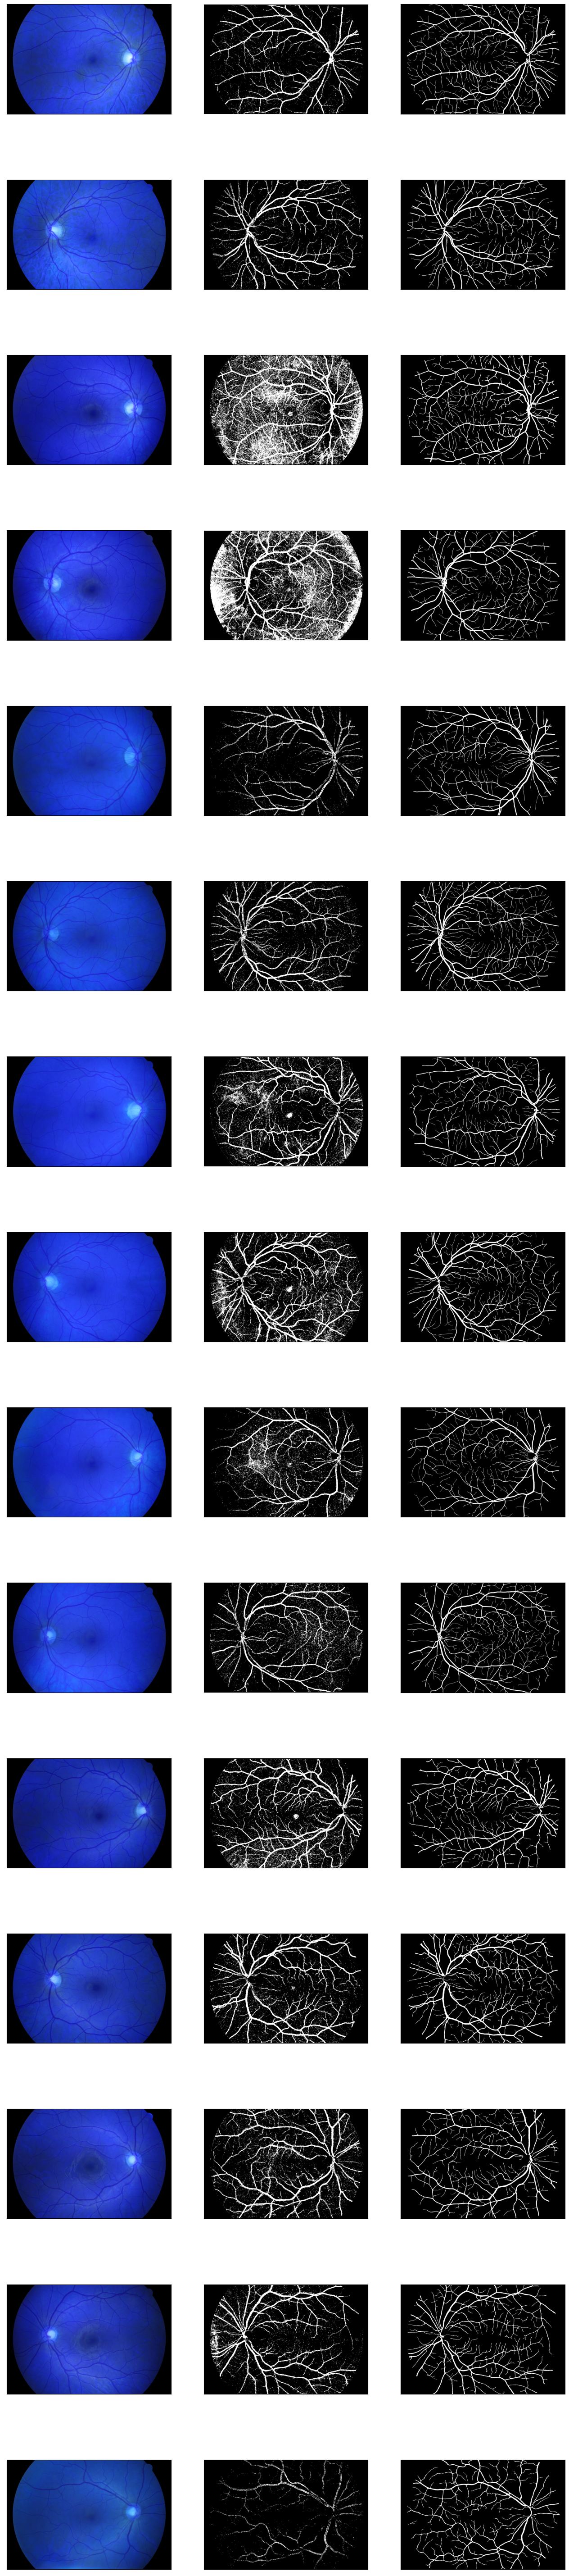

In [9]:
helpful.show_images(list(zip(in_images, pred_images, manual_images)))